In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [100]:
df=pd.read_csv('/content/diabetes.csv')

In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [104]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [105]:
q1,q3

(Pregnancies                  1.00000
 Glucose                     99.00000
 BloodPressure               62.00000
 SkinThickness                0.00000
 Insulin                      0.00000
 BMI                         27.30000
 DiabetesPedigreeFunction     0.24375
 Age                         24.00000
 Outcome                      0.00000
 Name: 0.25, dtype: float64,
 Pregnancies                   6.00000
 Glucose                     140.25000
 BloodPressure                80.00000
 SkinThickness                32.00000
 Insulin                     127.25000
 BMI                          36.60000
 DiabetesPedigreeFunction      0.62625
 Age                          41.00000
 Outcome                       1.00000
 Name: 0.75, dtype: float64)

/tmp/ipython-input-2133010545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'],hist=False)


<Axes: xlabel='Insulin', ylabel='Density'>

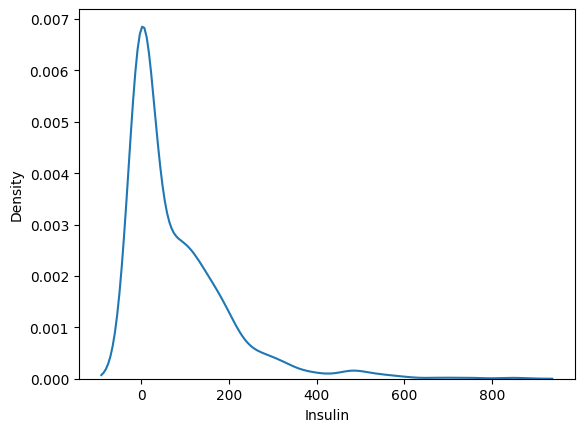

In [106]:
sns.distplot(df['Insulin'],hist=False)

<Axes: >

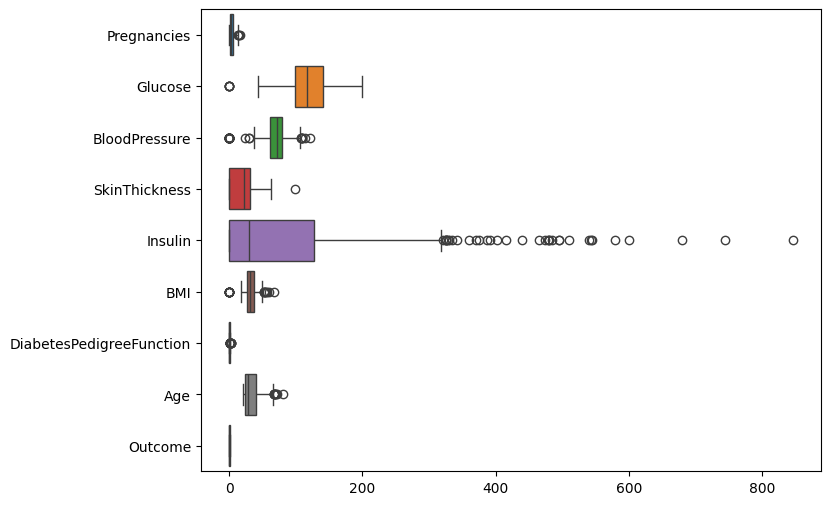

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,orient='h')

In [108]:
q1_insulin=df['Insulin'].quantile(0.25)
q3_insulin=df['Insulin'].quantile(0.75)
iqr_insulin=q3_insulin-q1_insulin

In [109]:
min=q1_insulin-(1.5*iqr_insulin)
max=q3_insulin+(1.5*iqr_insulin)

In [110]:
df['Insulin']=np.where(
    df['Insulin']>max,
    max,
    np.where(
        df['Insulin']<min,
        min,
        df['Insulin']
    )
)

<Axes: xlabel='Insulin'>

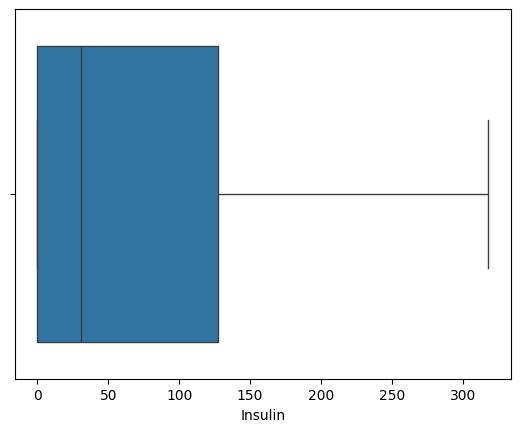

In [111]:
sns.boxplot(df['Insulin'],orient='h')

In [112]:
q1_BloodPressure=df['BloodPressure'].quantile(0.25)
q3_BloodPressure=df['BloodPressure'].quantile(0.75)
iqr_BloodPressure=q3_BloodPressure-q1_BloodPressure
min_BloodPressure=q1_BloodPressure-(1.5*iqr_BloodPressure)
max_BloodPressure=q3_BloodPressure+(1.5*iqr_BloodPressure)
df['BloodPressure']=np.where(
    df['BloodPressure']>max_BloodPressure,
    max_BloodPressure,
    np.where(
        df['BloodPressure']<min_BloodPressure,
        min_BloodPressure,
        df['BloodPressure']
    )
)

<Axes: xlabel='BloodPressure'>

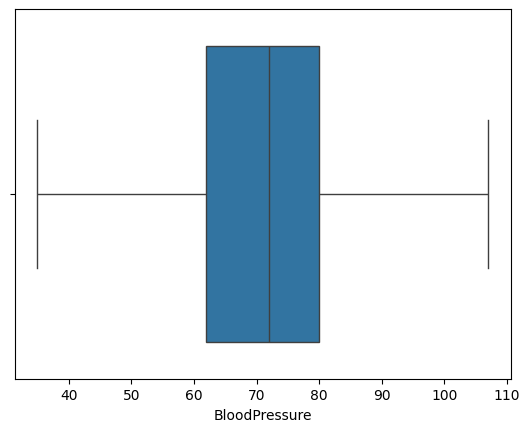

In [113]:
sns.boxplot(df['BloodPressure'],orient='h')

In [114]:
q1_BMI=df['BMI'].quantile(0.25)
q3_BMI=df['BMI'].quantile(0.75)
iqr_BMI=q3_BMI-q1_BMI
min_BMI=q1_BMI-(1.5*iqr_BMI)
max_BMI=q3_BMI+(1.5*iqr_BMI)
df['BMI']=np.where(
    df['BMI']>max_BMI,
    max_BMI,
    np.where(
        df['BMI']<min_BMI,
        min_BMI,
        df['BMI']
    )
)

<Axes: xlabel='BMI'>

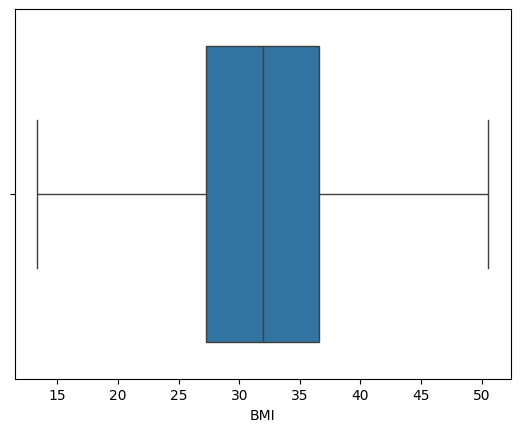

In [115]:
sns.boxplot(df['BMI'],orient='h')

In [116]:
q1_Age=df['Age'].quantile(0.25)
q3_Age=df['Age'].quantile(0.75)
iqr_Age=q3_Age-q1_Age
min_Age=q1_Age-(1.5*iqr_Age)
max_Age=q3_Age+(1.5*iqr_Age)
df['Age']=np.where(
    df['Age']>max_Age,
    max_Age,
    np.where(
        df['Age']<min_Age,
        min_Age,
        df['Age']
    )
)

<Axes: xlabel='Age'>

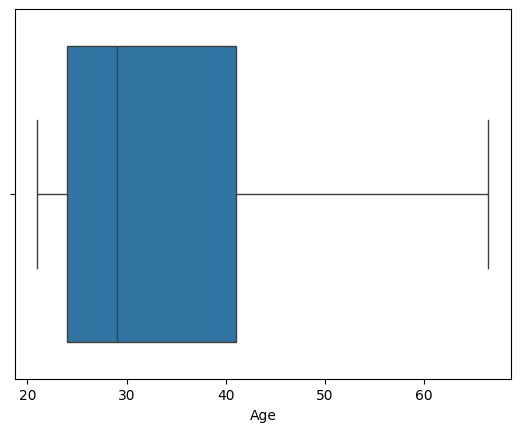

In [117]:
sns.boxplot(df['Age'],orient='h')

<Axes: xlabel='Pregnancies'>

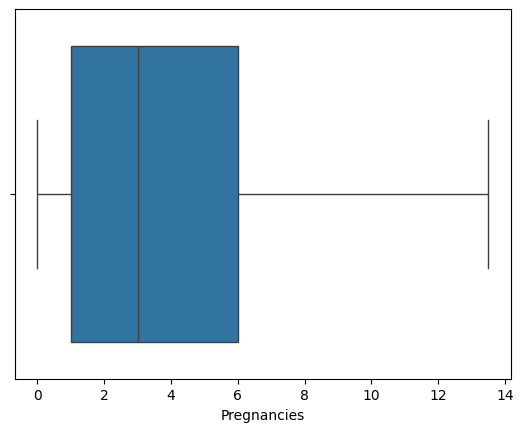

In [118]:
q1_Pregnancies=df['Pregnancies'].quantile(0.25)
q3_Pregnancies=df['Pregnancies'].quantile(0.75)
iqr_Pregnancies=q3_Pregnancies-q1_Pregnancies
min_Pregnancies=q1_Pregnancies-(1.5*iqr_Pregnancies)
max_Pregnancies=q3_Pregnancies+(1.5*iqr_Pregnancies)
df['Pregnancies']=np.where(
    df['Pregnancies']>max_Pregnancies,
    max_Pregnancies,
    np.where(
        df['Pregnancies']<min_Pregnancies,
        min_Pregnancies,
        df['Pregnancies']
    )
)
sns.boxplot(df['Pregnancies'],orient='h')

<Axes: >

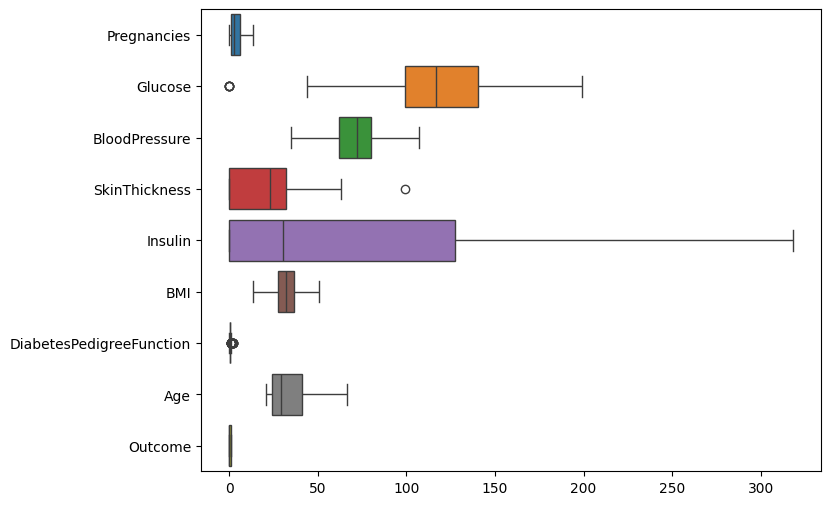

In [119]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,orient='h')

In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,120.894531,70.684896,20.536458,73.652669,32.125065,0.471876,33.199870,0.348958
std,3.344157,31.972618,14.197239,15.952218,93.576029,7.049584,0.331329,11.628404,0.476951
min,0.000000,0.000000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,99.000000,318.125000,50.550000,2.420000,66.500000,1.000000


In [121]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [122]:
x.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
501,3.0,84,72.0,32,0.0,37.2,0.267,28.0
558,11.0,103,68.0,40,0.0,46.2,0.126,42.0
358,12.0,88,74.0,40,54.0,35.3,0.378,48.0
384,1.0,125,70.0,24,110.0,24.3,0.221,25.0
744,13.0,153,88.0,37,140.0,40.6,1.174,39.0


In [123]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [124]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [125]:
x=scaler.transform(x)

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [127]:
print(x_train)
print(y_train)

[[-1.14819391 -0.05929342 -2.51514754 ...  0.03902558 -0.9992857
  -0.79167057]
 [ 0.64714967 -0.49745345 -0.04827292 ... -0.18808609 -1.05666795
   0.3270102 ]
 [-0.84896998  2.13150675 -0.75309424 ... -0.28744744 -0.2231152
   2.22016226]
 ...
 [ 2.14326933 -1.12339636  0.23365561 ... -0.28744744 -0.51908683
   0.15490546]
 [ 0.04870181 -0.27837344  0.51558414 ...  1.03263911 -0.71237443
   0.41306256]
 [-1.14819391 -1.09209922 -0.18923718 ...  0.52163787 -0.70633419
  -0.7056182 ]]
619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64


In [128]:
svm=svm.SVC(kernel='linear')

In [129]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [130]:
  x_train_prediction=svm.predict(x_train)
  training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [131]:
print("accuracy score of training data",training_data_accuracy)

accuracy score of training data 0.7801302931596091


In [132]:
  x_test_prediction=svm.predict(x_test)
  test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [133]:
print("accuracy score of test data",test_data_accuracy)

accuracy score of test data 0.7727272727272727


In [134]:
input=(4,110,92,0,0,37.6,0.191,30)
input_array=np.asarray(input)
input_reshape=input_array.reshape(1,-1)
std_data=scaler.transform(input_reshape)
print(std_data)
prediction=svm.predict(std_data)
print(prediction)
if(prediction[0]==0):
  print("person is not diabetic")
else:
  print("person is diabetic")

[[ 0.04870181 -0.34096773  1.50233399 -1.28821221 -0.787602    0.77713849
  -0.84827977 -0.27535637]]
[0]
person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7662337662337663

In [136]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
model_pred=model.predict(x_test)
accuracy_score(y_test,model_pred)

0.7532467532467533

In [137]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train, y_train)
model2_pred=model2.predict(x_test)
accuracy_score(y_test,model2_pred)

0.7077922077922078

In [142]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=500),
    'svm':svm.SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")


Logistic Regression Accuracy: 0.77
Random Forest Accuracy: 0.75
XGBoost Accuracy: 0.79
KNN Accuracy: 0.71
MLP Accuracy: 0.73
svm Accuracy: 0.77
